In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')

In [5]:
# Dimensiones
df.shape

(891, 12)

In [6]:
# Nombre de las columnas
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Tipos de datos
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Descripción variables numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
# Valores únicos
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
# Valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Muestra de datos
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# EDA datos titanic
# Limpieza de los datos

df_cleaned = df.copy()

In [14]:
# Eliminación de variables redundantes o poco útiles
df_cleaned = df_cleaned.copy().drop(['PassengerId','Name','Ticket','Cabin'],
axis=1)

In [15]:
# Rellenar los valores nulos de Age y embarked
mean = df_cleaned['Age'].mean()
df_cleaned['Age'].fillna(mean, inplace=True)

mode = df_cleaned['Embarked'].mode()[0]
df_cleaned['Embarked'].fillna(mode, inplace=True)

In [16]:
# Busqueda de outliers
Q1 = df_cleaned['Fare'].quantile(0.25)
Q3 = df_cleaned['Fare'].quantile(0.75)
IQR = Q3-Q1
cota_sup = Q3+1.5*IQR
outliers = (df_cleaned['Fare'] > cota_sup).sum()

print(f" Valores atipicos en Fare: {outliers}")
print(f" Cota superior: {cota_sup:.2f}")
print(f" Valor maximo: {df_cleaned['Fare'].max():.2f}")

 Valores atipicos en Fare: 116
 Cota superior: 65.63
 Valor maximo: 512.33


In [17]:
df_cleaned.shape

(891, 8)

<Axes: >

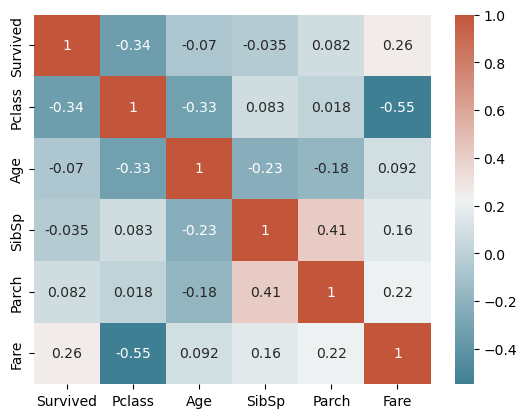

In [18]:
# Matriz de correlación para las variables numéricas
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

corr = df_cleaned[numeric_cols].corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    annot=True,
    cmap=sns.diverging_palette(220, 20, as_cmap=True) 
)

In [19]:
# Correlaciones con Survived
survived_corr = corr['Survived'].sort_values(ascending=False)
print(survived_corr)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64


<Axes: xlabel='Age', ylabel='Fare'>

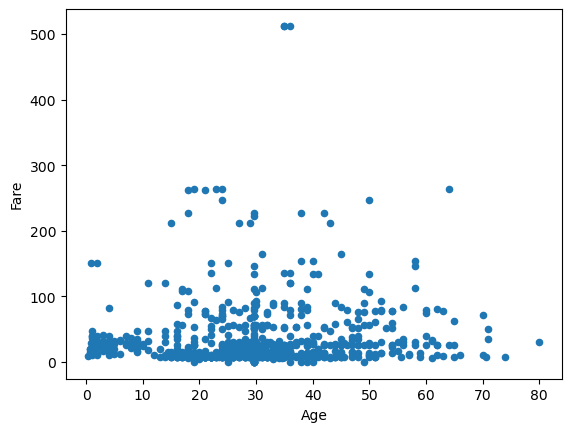

In [22]:
# Scatterplot
# Las primeras variables que graficaremos para entender su relación son:
# Age y Fare

df_cleaned.plot(kind='scatter',x='Age',y='Fare')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


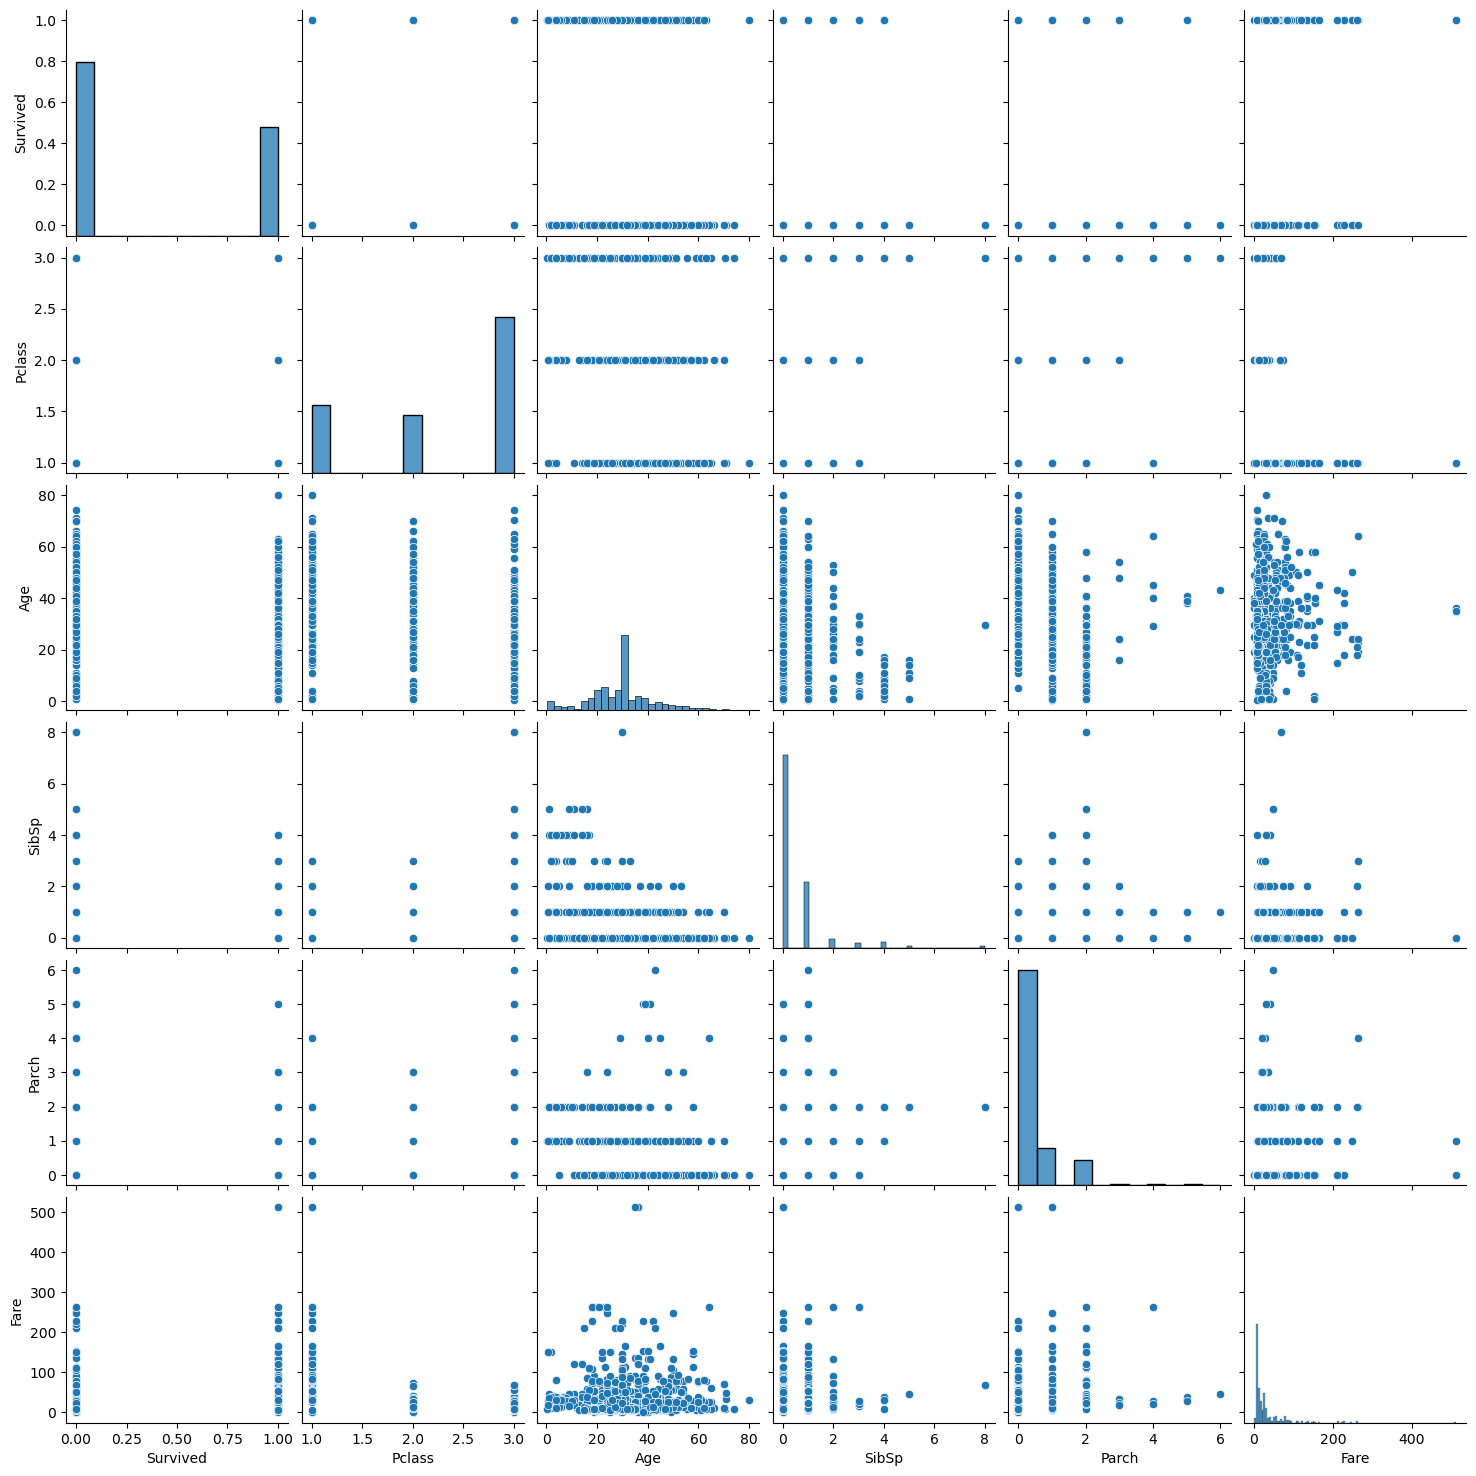

In [28]:
# Ahora vamos a ver como la relación entre todas las variables
sns.pairplot(df_cleaned)

<Axes: ylabel='Frequency'>

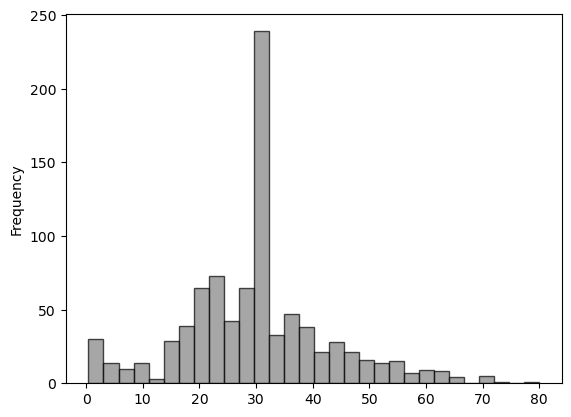

In [29]:
# Histogram
# El primero que veremos será el de edad
df_cleaned['Age'].plot(kind='hist', bins=30, color='grey', edgecolor='black', alpha=0.7)

<Axes: ylabel='Frequency'>

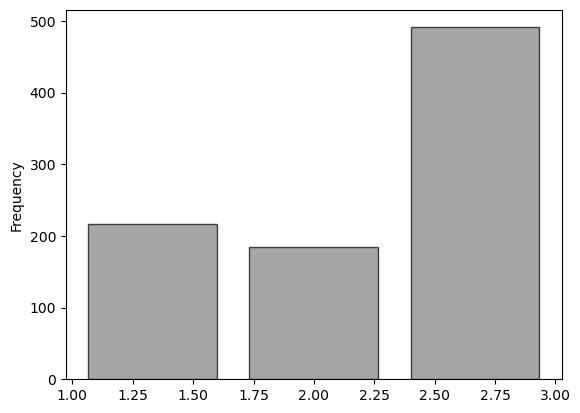

In [31]:
# también veremos el histograma de las clases
df_cleaned['Pclass'].plot(kind='hist', bins=3, color='grey', edgecolor='black', alpha=0.7, rwidth=0.8)

<Axes: >

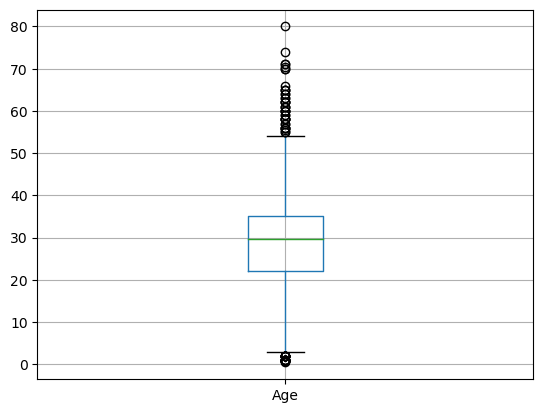

In [35]:
# Boxplots
df_cleaned.boxplot('Age')


<Axes: >

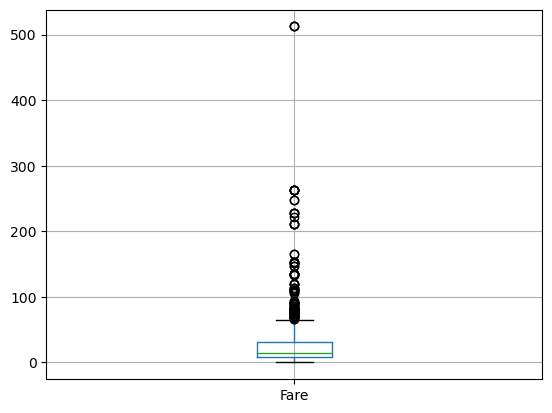

In [36]:
df_cleaned.boxplot('Fare')


<Axes: xlabel='Pclass', ylabel='Fare'>

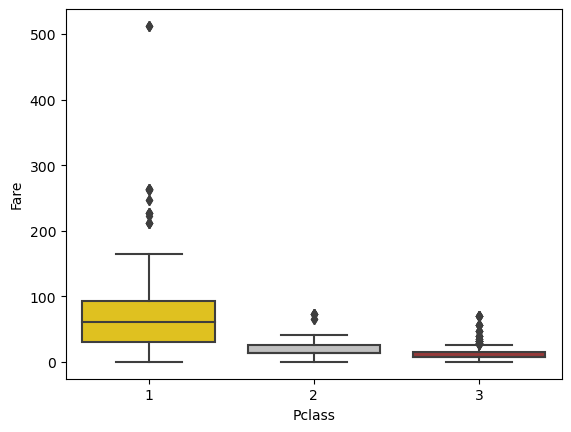

In [37]:
sns.boxplot(data=df_cleaned, x='Pclass', y='Fare', 
           palette=['gold', 'silver', 'brown'])